# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/Users/brookelumpkin/Desktop/understanding_uncertainty/nhanes_data_17_18.csv')
df

/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_13578/1980896258.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/brookelumpkin/Desktop/understanding_uncertainty/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['GeneralHealthCondition_na'] = df['EverBreastfedOrFedBreastmilk'].isna()
df['GeneralHealthCondition_na'].value_counts()

GeneralHealthCondition_na
True     7297
False    1069
Name: count, dtype: int64

In [11]:
df['EverBreastfedOrFedBreastmilk'].value_counts()

EverBreastfedOrFedBreastmilk
1.0    862
0.0    207
Name: count, dtype: int64

In [12]:
pd.crosstab(df['GeneralHealthCondition_na'], df['EverBreastfedOrFedBreastmilk'])

EverBreastfedOrFedBreastmilk,0.0,1.0
GeneralHealthCondition_na,,
False,207,862


In [13]:
df['GeneralHealthCondition'].isna().sum()

np.int64(2402)

The data shows a lot of missing values beacsue not every question is asked to every respondent. For example, the breasfeeding variable is mostly NaN for adults since it only applies to children. That's why the valid responses drop down to a smaller subset. Within that subset, most reported being breastfed, while a smaller group said no. This pattern highlights that the migging values isn't random but tied to survey design. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [14]:
df['CurrentSelfreportedWeightPounds'].isna().sum()
df['GeneralHealthCondition'].isna().sum()
print(df['CurrentSelfreportedWeightPounds'].isna().sum())
print(df['GeneralHealthCondition'].isna().sum())

2538
2402


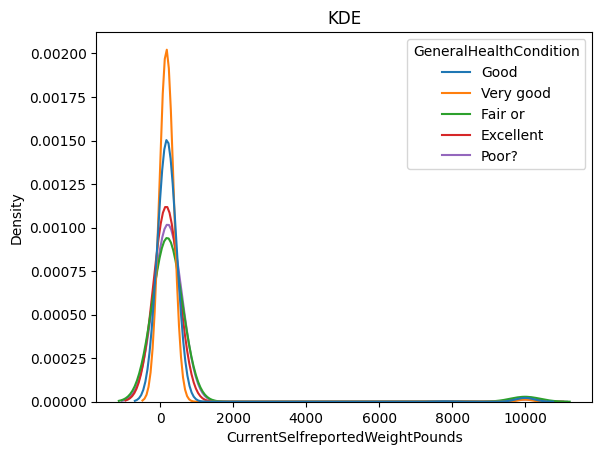

In [15]:
import seaborn as sns
conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=df, x='CurrentSelfreportedWeightPounds', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()

The density plots show that weight distributions across the different health categories are fairly similar, with most groups overlapping a lot. Still, there are some noticeable shifts, people who rated their health as “excellent” or “very good” tend to cluster at lower weights, while those in the “fair” and “poor” categories show slightly higher weights and a wider spread. There are also some extreme outliers with unrealistically high values, which are likely coding errors or placeholder numbers rather than real data. Overall, the pattern suggests a weak relationship where worse self-reported health lines up with higher weight, but it’s not a strong separatio

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [27]:
df = pd.read_csv('/Users/brookelumpkin/Desktop/understanding_uncertainty/00_intro/data/college_completion.csv')
df

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43,81,NaN,NaN,12.0
3794,3794,462354,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74,81,NaN,NaN,33.0
3795,3795,466921,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20,81,NaN,NaN,8.0
3796,3796,474881,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,81,NaN,NaN,145.0


In [28]:
x = df['vsa_grad_after6_transfer']
y = df['cohort_size']

Computed bandwidth is: 2.828391008936632


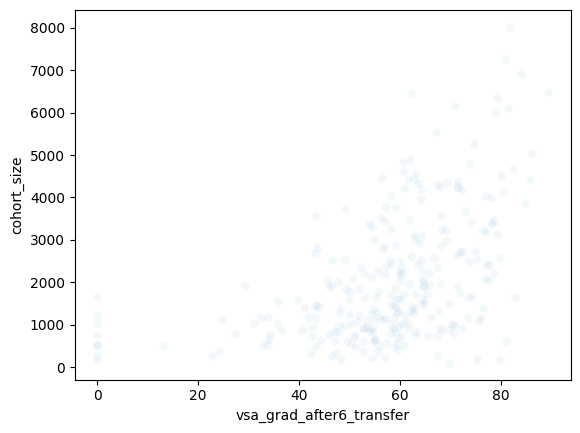

In [29]:
def lcls(x,y, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=df, y='cohort_size', x='vsa_grad_after6_transfer',alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

I looked at the relationship between the 6-year graduation rate for transfer students (vsa_grad_after6_transfer) and the size of the entering cohort (cohort_size). Using the Nadaraya–Watson smoother, the pattern shows that schools with very low transfer graduation rates also tend to have smaller and more scattered cohort sizes. As the graduation rate goes up, the average cohort size gradually increases, especially in the middle range (around 40–70%). After that point the trend flattens out, so schools with the very highest transfer graduation rates don’t necessarily have much larger cohorts. There’s also a lot more variability among the bigger schools, which the smoother helps balance out. Overall, the result suggests a weak but positive link between cohort size and transfer student outcomes, though the relationship isn’t perfectly linear.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

<Axes: xlabel='vsa_grad_after6_transfer', ylabel='cohort_size'>

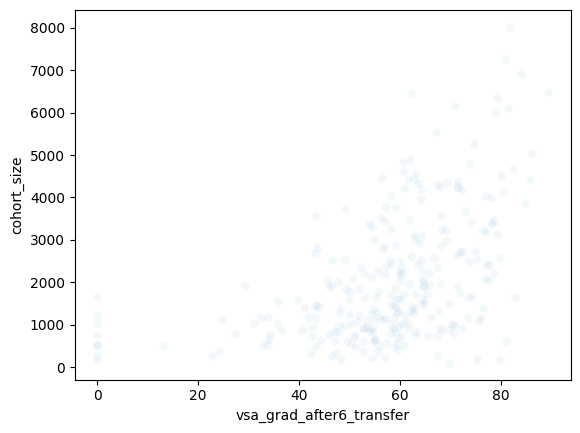

In [30]:
sns.scatterplot(data=df, y='cohort_size', x='vsa_grad_after6_transfer',alpha=.05)

<Axes: xlabel='vsa_grad_after6_transfer', ylabel='cohort_size'>

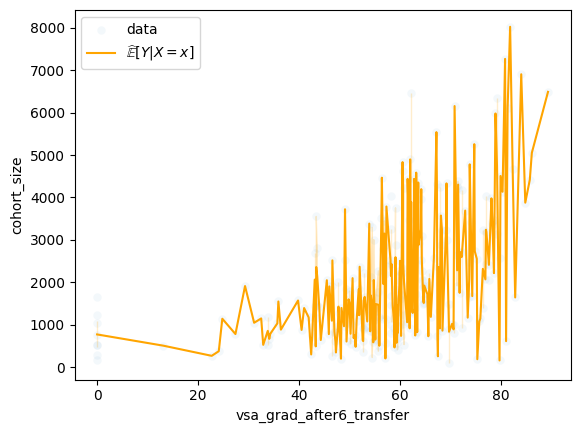

In [31]:
means = df.loc[:,['vsa_grad_after6_transfer','cohort_size']].groupby('cohort_size').mean()
sns.scatterplot(data=df, y='cohort_size', x='vsa_grad_after6_transfer',alpha=.05, label='data')
sns.lineplot(data=means, x='vsa_grad_after6_transfer',y='cohort_size',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

Even if we can’t make a strong causal claim, the model is still useful for prediction. The smoother captures the average relationship between graduation rates and cohort size in the data, so if I’m given a new value of X (graduation rate), I can use the model to estimate a likely value of Y (cohort size). This works because we’re not trying to change or manipulate graduation rates, just using the existing pattern to make forecasts. As long as we stay in the range of the observed data, the model can give reasonable predictions without needing to prove a direct cause-and-effect link